In [59]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()


# import the class
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn                 import metrics

import matplotlib.pyplot     as plt
%matplotlib inline

# split - train - test

X = iris.data                 # create X (features) and y (response)
y = iris.target               # create X (features) and y (response) 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)  # split

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test:  ', y_test.shape)


### logreg
logreg = LogisticRegression()  # instantiate model w/ default parameters
logreg.fit(X_train, y_train)   # fit w/data
y_pred= logreg.predict(X_test) # predict the response on test data
print ('logreg:          ', metrics.accuracy_score(y_test, y_pred)) #compare true outcome (y_test) with predicted outcome (y_pred)

### knn 5
knn5 = KNeighborsClassifier (n_neighbors = 5) # instantiate model w/ default parameters
knn5.fit(X_train, y_train)                    # fit w/data
y_pred = knn5.predict(X_test)                 # predict the response on test data
print ('n_neighbors = 5: ', metrics.accuracy_score(y_test, y_pred))  #compare true outcome (y_test) with predicted outcome (y_pred)

### knn 1
knn1 = KNeighborsClassifier (n_neighbors = 1) # instantiate model w/ default parameters
knn1.fit(X_train, y_train)                    # fit w/data
y_pred = knn1.predict(X_test) # predict the response on test data
print ('n_neighbors = 1: ', metrics.accuracy_score(y_test, y_pred)) #compare true outcome (y_test) with predicted outcome (y_pred)



X_train:  (90, 4)
X_test:   (60, 4)
y_train:  (90,)
y_test:   (60,)
logreg:           0.916666666667
n_neighbors = 5:  0.95
n_neighbors = 1:  0.966666666667


n_neighbors =  1 :  0.966666666667
n_neighbors =  2 :  0.933333333333
n_neighbors =  3 :  0.983333333333
n_neighbors =  4 :  0.983333333333
n_neighbors =  5 :  0.983333333333
n_neighbors =  6 :  0.966666666667
n_neighbors =  7 :  0.966666666667
n_neighbors =  8 :  0.966666666667
n_neighbors =  9 :  0.983333333333
n_neighbors =  10 :  0.966666666667
n_neighbors =  11 :  0.966666666667
n_neighbors =  12 :  0.966666666667
n_neighbors =  13 :  0.966666666667
n_neighbors =  14 :  0.95
n_neighbors =  15 :  0.966666666667
n_neighbors =  16 :  0.95
n_neighbors =  17 :  0.966666666667
n_neighbors =  18 :  0.95
n_neighbors =  19 :  0.966666666667
n_neighbors =  20 :  0.95
n_neighbors =  21 :  0.95
n_neighbors =  22 :  0.9
n_neighbors =  23 :  0.916666666667
n_neighbors =  24 :  0.9
n_neighbors =  25 :  0.916666666667
n_neighbors =  26 :  0.916666666667
n_neighbors =  27 :  0.916666666667
n_neighbors =  28 :  0.916666666667
n_neighbors =  29 :  0.916666666667
n_neighbors =  30 :  0.916666666667


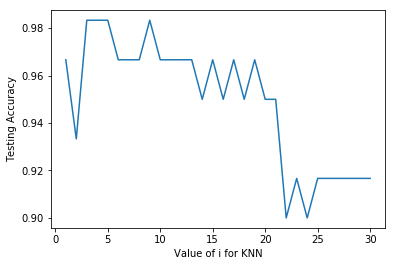

In [58]:
import matplotlib.pyplot     as plt
%matplotlib inline

scores_list = []
for i in range (1, 31):                          # 30 loops
    knn = KNeighborsClassifier (n_neighbors = i) # instantiate model w/ default parameters
    knn.fit(X_train, y_train)                    # fit w/data
    y_pred = knn.predict(X_test) # predict the response on test data
    print ('n_neighbors = ', i, ': ', metrics.accuracy_score(y_test, y_pred)) #compare true outcome (y_test) with predicted outcome (y_pred)
    scores_list.append (metrics.accuracy_score(y_test, y_pred))

plt.plot(range (1, 31), scores_list)
plt.xlabel('Value of i for KNN')
plt.ylabel('Testing Accuracy')

(250,)
X_train:  (150, 3)
X_test:   (100, 3)
y_train:  (150,)
y_test:   (100,)
39.6479185444
[ -1.62537580e-02   1.40340143e-06   9.85421804e-04]
0.379471071323


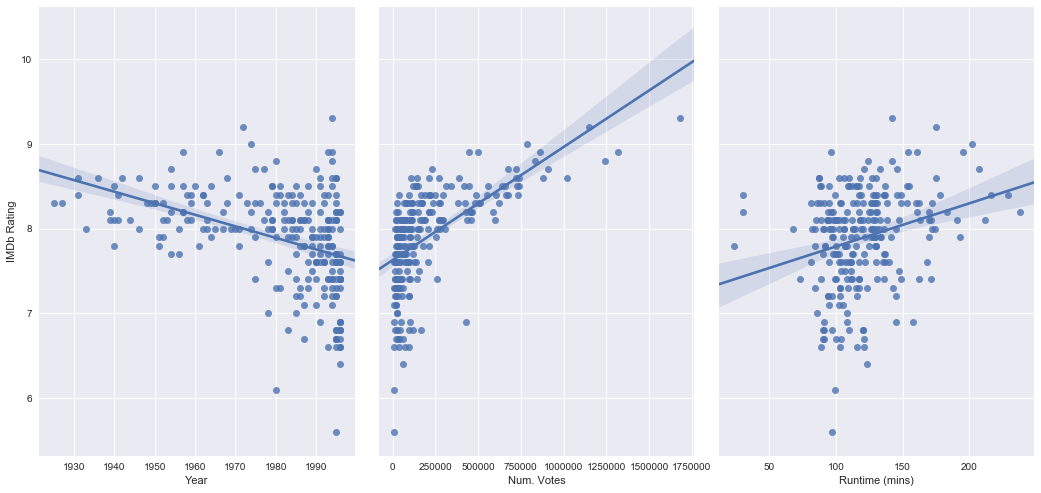

In [112]:
import pandas as pd
data = pd.read_csv ('data/IMDb Top 250 1996.csv', index_col=0)
data.tail(1)

import seaborn as sns
%matplotlib inline
sns.pairplot (  data
              , x_vars = ['Year', 'Num. Votes', 'Runtime (mins)']
              , y_vars = ['IMDb Rating']
              , size =7, aspect = 0.7
              , kind = 'reg')

feature_cols = ['Year', 'Num. Votes', 'Runtime (mins)']  #list
X = data[feature_cols]
y = data['IMDb Rating']   #space in name!! cannot be accessed directly
print (y.shape)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)  # split

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test:  ', y_test.shape)


from sklearn.linear_model    import LinearRegression
linreg = LinearRegression()    # instantiate model w/ default parameters
linreg.fit(X_train, y_train)   # fit w/data
y_pred= linreg.predict(X_test) # predict the response on test data

# y = intercept + (coef_feat1 *feat1)  + (coef_feat2 *feat2) + ....
print(linreg.intercept_)        # estimated attr trailing _    
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE as small as possible(adv: same unit as y,)

In [115]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# read in the iris data
iris = load_iris()
X = iris.data
y = iris.target


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores, ' mean: ', scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667


1 [ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]  mean:  0.96
2 [ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  0.93333333  1.          1.        ]  mean:  0.953333333333
3 [ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667
4 [ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667
5 [ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667
6 [ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667
7 [ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]  mean:  0.966666666667
8 [ 1.

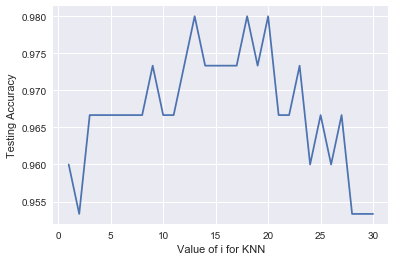

In [116]:
import matplotlib.pyplot     as plt
%matplotlib inline

scores_list = []
for i in range (1, 31):                          # 30 loops
    
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print(i, scores, ' mean: ', scores.mean())
    scores_list.append (scores.mean())

plt.plot(range (1, 31), scores_list)
plt.xlabel('Value of i for KNN')
plt.ylabel('Testing Accuracy')

In [120]:
# 10-fold cross-validation  
knn = KNeighborsClassifier(n_neighbors=20)
print('KNN20: ', cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print('logreg:',cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
 

KNN20:  0.98
logreg: 0.953333333333


(250,)
X_train:  (150, 3)
X_test:   (100, 3)
y_train:  (150,)
y_test:   (100,)
linreg: 0.384781508133


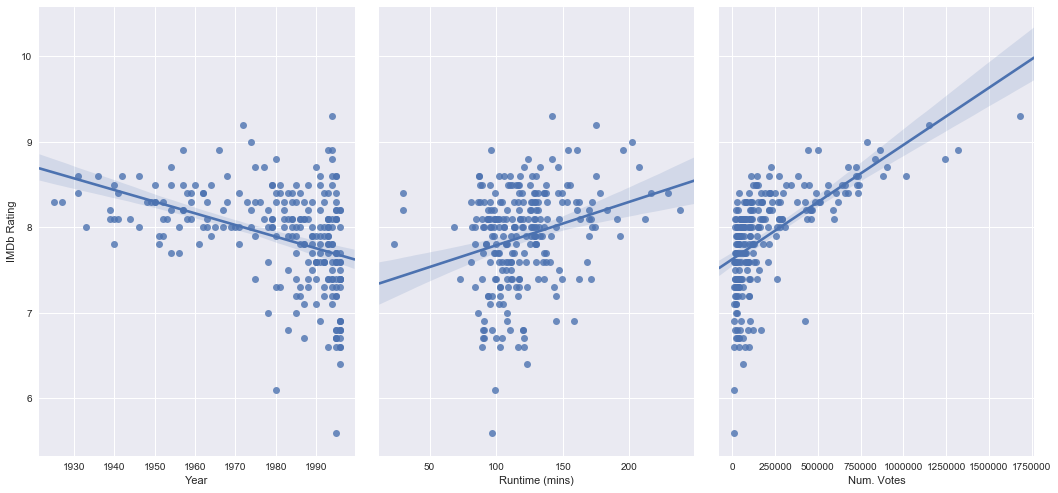

In [131]:
import pandas as pd
data = pd.read_csv ('data/IMDb Top 250 1996.csv', index_col=0)
data.tail(1)

import seaborn as sns
%matplotlib inline
sns.pairplot (  data
              , x_vars = ['Year', 'Runtime (mins)', 'Num. Votes']
              , y_vars = ['IMDb Rating']
              , size =7, aspect = 0.7
              , kind = 'reg')

feature_cols = ['Year', 'Num. Votes'  ,'Runtime (mins)']  #list
X = data[feature_cols]
y = data['IMDb Rating']   #space in name!! cannot be accessed directly
print (y.shape)

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)  # split

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test:  ', y_test.shape)


from sklearn.linear_model    import LinearRegression
linreg = LinearRegression()    # instantiate model w/ default parameters
linimport pandas as pd
data = pd.read_csv ('data/IMDb Top 250 1996.csv', index_col=0)reg.fit(X_train, y_train)   # fit w/data
y_pred= linreg.predict(X_test) # predict the response on test data

# calculate the average RMSE  - workaround as not avail in cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 
print('linreg:',np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
 

In [ ]:
knn = KNeighborsClassifier (n_neighbors = i) # instantiate model w/ default parameters
    knn.fit(X_train, y_train)                    # fit w/data
    y_pred = knn.predict(X_test) # predict the response on test data
    print ('n_neighbors = ', i, ': ', metrics.accuracy_score(y_test, y_pred)) 

In [109]:


# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

 
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))
 
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))


10.0
10.0
150.0
150.0
12.2474487139
12.2474487139


In [103]:
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

37.4217119455
[ -1.50843672e-02   1.50810313e-06   1.13673988e-04]


[('Year', -0.015084367162815656),
 ('Num. Votes', 1.5081031278634447e-06),
 ('Runtime (mins)', 0.00011367398826905018)]

In [25]:
### knn 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors = 5)
knn.fit(X, y)

y_pred = knn.predict(X)
print ('n_neighbors = 5: ', metrics.accuracy_score(y, y_pred))


### knn 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors = 1)
knn.fit(X, y)

y_pred = knn.predict(X)
print ('n_neighbors = 1: ', metrics.accuracy_score(y, y_pred))

n_neighbors = 5:  0.966666666667
n_neighbors = 1:  1.0


In [43]:
# split - train - test
# create X (features) and y (response)

X = iris.data
y = iris.target

# 1) split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test:  ', y_test.shape)


X_train:  (90, 4)
X_test:   (60, 4)
y_train:  (90,)
y_test:   (60,)


In [35]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn              import metrics

logreg = LogisticRegression()  # instantiate model w/ default parameters
logreg.fit(X_train, y_train)   # fit w/data
y_pred= logreg.predict(X_test) # predict the response on test data

#compare true outcome (y_test) with predicted outcome (y_pred)
print ('logreg: ', metrics.accuracy_score(y_test, y_pred)) 
 

logreg:  0.916666666667


In [57]:
### knn 11 (chosen parameter, fitted with full dataset)
knn11 = KNeighborsClassifier (n_neighbors = 11) # instantiate model w/ default parameters
knn11.fit(X, y)                          # fit w/ full data set (train + test)
knn11.predict([[3, 5, 4, 2]])             # predict the response on test data


array([1])